In [2]:
import gc
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../")
import time
import warnings
warnings.simplefilter("ignore")
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
from utils.common import sigmoid, reverse_sigmoid
from utils.constants import *
from utils.extraction_helpers import read_file

In [4]:
%load_ext autoreload
%autoreload

### Gambling5

In [33]:
chris  = read_file(f"{SUBMISSION_DATA_PATH}/sorted_chris.csv")
waikey = read_file(f"{SUBMISSION_DATA_PATH}/wk_seed_6666.csv")
ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_ensemble.csv")
exp_ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_exponential_ensemble.csv")
blend_trees = read_file(f"{SUBMISSION_DATA_PATH}/others_blend_boosted_tree.csv")

Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)


In [34]:
waikey["sigmoid_prediction"] = waikey["prediction"].apply(sigmoid)
chris["reverse_sigmoid_prediction"] = chris["prediction"].apply(reverse_sigmoid)
ensemble["reverse_sigmoid_prediction"] = ensemble["prediction"].apply(reverse_sigmoid)
exp_ensemble["reverse_sigmoid_prediction"] = exp_ensemble["prediction"].apply(reverse_sigmoid)
blend_trees["reverse_sigmoid_prediction"] = blend_trees["prediction"].apply(reverse_sigmoid)

In [35]:
pre_blend_df = pd.DataFrame(
    dict(
        wk=waikey["sigmoid_prediction"],
        chris=chris["prediction"],
        ensemble=ensemble["prediction"],
        exp_ensemble=exp_ensemble["prediction"],
        blend_trees=blend_trees["prediction"]
    )
)

In [36]:
mscaler = MinMaxScaler()
s1 = mscaler.fit_transform(pre_blend_df[["ensemble"]])[:, 0]
s2 = mscaler.fit_transform(pre_blend_df[["blend_trees"]])[:, 0]

In [37]:
std_list = []
for weight in tqdm(np.arange(0.5, 0.6, 0.01)):
    pre_blend_df["tree_ensemble"] = weight * s1 + (1 - weight) * s2
    pre_blend_df = pre_blend_df.drop(columns=["blend_trees", "ensemble"], errors="ignore")
    std_list.append(pre_blend_df["tree_ensemble"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.01it/s]


In [38]:
# t = pd.DataFrame(dict(weights=np.arange(0.01, 1, 0.01), std=std_list))
# t.nsmallest(10, "std")

In [39]:
mscaler = MinMaxScaler()
pre_blend_df["exp_ensemble"] = mscaler.fit_transform(pre_blend_df[["exp_ensemble"]])[:, 0]

In [40]:
pre_blend_df.corr()

,wk,chris,exp_ensemble,tree_ensemble
wk,1.000000,0.975540,0.984327,0.996912
chris,0.975540,1.000000,0.979640,0.974849
exp_ensemble,0.984327,0.979640,1.000000,0.989498
tree_ensemble,0.996912,0.974849,0.989498,1.000000


In [41]:
pre_blend_df["final1"] = (
    0.56 * pre_blend_df["wk"] + 0.18 * pre_blend_df["chris"] + 0.11 * pre_blend_df["tree_ensemble"] + 0.15 * pre_blend_df["exp_ensemble"]
)

In [42]:
# sub = pd.read_csv(f"{SUBMISSION_DATA_PATH}/empty.csv")
# sub["prediction"] = pre_blend_df["final1"].values
# sub.to_csv(f"{SUBMISSION_DATA_PATH}/gambling5.csv", index=False)

In [20]:
# gambling1 = read_file(f"{SUBMISSION_DATA_PATH}/gambling5.csv")

Shape of data: (924621, 2)


### Gambling6

In [43]:
chris  = read_file(f"{SUBMISSION_DATA_PATH}/sorted_chris.csv")
waikey = read_file(f"{SUBMISSION_DATA_PATH}/wk_seed_6666.csv")
ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_ensemble.csv")
exp_ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_exponential_ensemble.csv")
blend_trees = read_file(f"{SUBMISSION_DATA_PATH}/others_blend_boosted_tree.csv")

Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)


In [44]:
waikey["sigmoid_prediction"] = waikey["prediction"].apply(sigmoid)
chris["reverse_sigmoid_prediction"] = chris["prediction"].apply(reverse_sigmoid)
ensemble["reverse_sigmoid_prediction"] = ensemble["prediction"].apply(reverse_sigmoid)
exp_ensemble["reverse_sigmoid_prediction"] = exp_ensemble["prediction"].apply(reverse_sigmoid)
blend_trees["reverse_sigmoid_prediction"] = blend_trees["prediction"].apply(reverse_sigmoid)

In [45]:
pre_blend_df = pd.DataFrame(
    dict(
        wk=waikey["sigmoid_prediction"],
        chris=chris["prediction"],
        ensemble=ensemble["prediction"],
        exp_ensemble=exp_ensemble["prediction"],
        blend_trees=blend_trees["prediction"]
    )
)

In [46]:
mscaler = MinMaxScaler()
s1 = mscaler.fit_transform(pre_blend_df[["ensemble"]])[:, 0]
s2 = mscaler.fit_transform(pre_blend_df[["blend_trees"]])[:, 0]

In [47]:
std_list = []
for weight in tqdm(np.arange(0.5, 0.6, 0.01)):
    pre_blend_df["tree_ensemble"] = weight * s1 + (1 - weight) * s2
    pre_blend_df = pre_blend_df.drop(columns=["blend_trees", "ensemble"], errors="ignore")
    std_list.append(pre_blend_df["tree_ensemble"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32.83it/s]


In [48]:
# t = pd.DataFrame(dict(weights=np.arange(0.01, 1, 0.01), std=std_list))
# t.nsmallest(10, "std")

In [49]:
mscaler = MinMaxScaler()
pre_blend_df["exp_ensemble"] = mscaler.fit_transform(pre_blend_df[["exp_ensemble"]])[:, 0]

In [50]:
pre_blend_df.corr()

,wk,chris,exp_ensemble,tree_ensemble
wk,1.000000,0.975540,0.984327,0.996912
chris,0.975540,1.000000,0.979640,0.974849
exp_ensemble,0.984327,0.979640,1.000000,0.989498
tree_ensemble,0.996912,0.974849,0.989498,1.000000


In [53]:
pre_blend_df["final1"] = (
    0.59 * pre_blend_df["wk"] + 0.19 * pre_blend_df["chris"] + 0.09 * pre_blend_df["tree_ensemble"] + 0.13 * pre_blend_df["exp_ensemble"]
)

In [60]:
# sub = pd.read_csv(f"{SUBMISSION_DATA_PATH}/empty.csv")
# sub["prediction"] = pre_blend_df["final1"].values
# sub.to_csv(f"{SUBMISSION_DATA_PATH}/gambling6.csv", index=False)

### Gambling7

In [61]:
gambling1 = read_file(f"{SUBMISSION_DATA_PATH}/gambling1_0.801.csv")

Shape of data: (924621, 2)


In [62]:
gambling6 = read_file(f"{SUBMISSION_DATA_PATH}/gambling6_0.801.csv")

Shape of data: (924621, 2)


In [63]:
sub = pd.read_csv(f"{SUBMISSION_DATA_PATH}/empty.csv")
sub["prediction"] = 0.5 * gambling1["prediction"] + 0.5 * gambling6["prediction"]
sub.to_csv(f"{SUBMISSION_DATA_PATH}/gambling7.csv", index=False)

### Gambling8

In [4]:
chris  = read_file(f"{SUBMISSION_DATA_PATH}/sorted_chris.csv")
waikey = read_file(f"{SUBMISSION_DATA_PATH}/wk_seed_6666.csv")
ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_ensemble.csv")
exp_ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_exponential_ensemble.csv")
blend_trees = read_file(f"{SUBMISSION_DATA_PATH}/others_blend_boosted_tree.csv")

Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)


In [5]:
waikey["sigmoid_prediction"] = waikey["prediction"].apply(sigmoid)
chris["reverse_sigmoid_prediction"] = chris["prediction"].apply(reverse_sigmoid)
ensemble["reverse_sigmoid_prediction"] = ensemble["prediction"].apply(reverse_sigmoid)
exp_ensemble["reverse_sigmoid_prediction"] = exp_ensemble["prediction"].apply(reverse_sigmoid)
blend_trees["reverse_sigmoid_prediction"] = blend_trees["prediction"].apply(reverse_sigmoid)

In [12]:
pre_blend_df = pd.DataFrame(
    dict(
        wk=waikey["sigmoid_prediction"],
        chris=chris["prediction"],
        ensemble=ensemble["prediction"],
        exp_ensemble=exp_ensemble["prediction"],
        blend_trees=blend_trees["prediction"]
    )
)

In [13]:
mscaler = MinMaxScaler()
s1 = mscaler.fit_transform(pre_blend_df[["ensemble"]])[:, 0]
s2 = mscaler.fit_transform(pre_blend_df[["blend_trees"]])[:, 0]

In [14]:
std_list = []
for weight in tqdm(np.arange(0.5, 0.6, 0.01)):
    pre_blend_df["tree_ensemble"] = weight * s1 + (1 - weight) * s2
    pre_blend_df = pre_blend_df.drop(columns=["blend_trees", "ensemble"], errors="ignore")
    std_list.append(pre_blend_df["tree_ensemble"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.58it/s]


In [15]:
# t = pd.DataFrame(dict(weights=np.arange(0.01, 1, 0.01), std=std_list))
# t.nsmallest(10, "std")

In [16]:
mscaler = MinMaxScaler()
pre_blend_df["exp_ensemble"] = mscaler.fit_transform(pre_blend_df[["exp_ensemble"]])[:, 0]

In [17]:
pre_blend_df.corr()

,wk,chris,exp_ensemble,tree_ensemble
wk,1.000000,0.975540,0.984327,0.996912
chris,0.975540,1.000000,0.979640,0.974849
exp_ensemble,0.984327,0.979640,1.000000,0.989498
tree_ensemble,0.996912,0.974849,0.989498,1.000000


In [20]:
cond1 = (pre_blend_df["wk"] >= pre_blend_df["chris"])

In [21]:
pre_blend_df.loc[cond1, "mix"] = (
    0.64 * pre_blend_df.loc[cond1, "wk"] + 0.14 * pre_blend_df.loc[cond1, "chris"]
)

In [22]:
cond2 = (pre_blend_df["wk"] < pre_blend_df["chris"])

In [23]:
pre_blend_df.loc[cond2, "mix"] = (
    0.57 * pre_blend_df.loc[cond2, "wk"] + 0.21 * pre_blend_df.loc[cond2, "chris"]
)

In [24]:
pre_blend_df["final1"] = (
    0.78 * pre_blend_df["mix"] + 0.09 * pre_blend_df["tree_ensemble"] + 0.13 * pre_blend_df["exp_ensemble"]
)

In [25]:
sub = pd.read_csv(f"{SUBMISSION_DATA_PATH}/empty.csv")
sub["prediction"] = pre_blend_df["final1"].values
sub.to_csv(f"{SUBMISSION_DATA_PATH}/gambling8_chris_pro_larger.csv", index=False)

### Gambling9

In [26]:
chris  = read_file(f"{SUBMISSION_DATA_PATH}/sorted_chris.csv")
waikey = read_file(f"{SUBMISSION_DATA_PATH}/wk_seed_6666.csv")
ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_ensemble.csv")
exp_ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_exponential_ensemble.csv")
blend_trees = read_file(f"{SUBMISSION_DATA_PATH}/others_blend_boosted_tree.csv")

Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)


In [27]:
waikey["sigmoid_prediction"] = waikey["prediction"].apply(sigmoid)
chris["reverse_sigmoid_prediction"] = chris["prediction"].apply(reverse_sigmoid)
ensemble["reverse_sigmoid_prediction"] = ensemble["prediction"].apply(reverse_sigmoid)
exp_ensemble["reverse_sigmoid_prediction"] = exp_ensemble["prediction"].apply(reverse_sigmoid)
blend_trees["reverse_sigmoid_prediction"] = blend_trees["prediction"].apply(reverse_sigmoid)

In [28]:
pre_blend_df = pd.DataFrame(
    dict(
        wk=waikey["sigmoid_prediction"],
        chris=chris["prediction"],
        ensemble=ensemble["prediction"],
        exp_ensemble=exp_ensemble["prediction"],
        blend_trees=blend_trees["prediction"]
    )
)

In [29]:
mscaler = MinMaxScaler()
s1 = mscaler.fit_transform(pre_blend_df[["ensemble"]])[:, 0]
s2 = mscaler.fit_transform(pre_blend_df[["blend_trees"]])[:, 0]

In [30]:
std_list = []
for weight in tqdm(np.arange(0.5, 0.6, 0.01)):
    pre_blend_df["tree_ensemble"] = weight * s1 + (1 - weight) * s2
    pre_blend_df = pre_blend_df.drop(columns=["blend_trees", "ensemble"], errors="ignore")
    std_list.append(pre_blend_df["tree_ensemble"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.24it/s]


In [31]:
# t = pd.DataFrame(dict(weights=np.arange(0.01, 1, 0.01), std=std_list))
# t.nsmallest(10, "std")

In [32]:
mscaler = MinMaxScaler()
pre_blend_df["exp_ensemble"] = mscaler.fit_transform(pre_blend_df[["exp_ensemble"]])[:, 0]

In [33]:
pre_blend_df.corr()

,wk,chris,exp_ensemble,tree_ensemble
wk,1.000000,0.975540,0.984327,0.996912
chris,0.975540,1.000000,0.979640,0.974849
exp_ensemble,0.984327,0.979640,1.000000,0.989498
tree_ensemble,0.996912,0.974849,0.989498,1.000000


In [35]:
cond1 = (pre_blend_df["wk"] >= pre_blend_df["chris"])

In [36]:
pre_blend_df.loc[cond1, "mix"] = (
    0.57 * pre_blend_df.loc[cond1, "wk"] + 0.21 * pre_blend_df.loc[cond1, "chris"]
)

In [37]:
cond2 = (pre_blend_df["wk"] < pre_blend_df["chris"])

In [38]:
pre_blend_df.loc[cond2, "mix"] = (
    0.64 * pre_blend_df.loc[cond2, "wk"] + 0.14 * pre_blend_df.loc[cond2, "chris"]
)

In [39]:
pre_blend_df["final1"] = (
    0.78 * pre_blend_df["mix"] + 0.09 * pre_blend_df["tree_ensemble"] + 0.13 * pre_blend_df["exp_ensemble"]
)

In [40]:
sub = pd.read_csv(f"{SUBMISSION_DATA_PATH}/empty.csv")
sub["prediction"] = pre_blend_df["final1"].values
sub.to_csv(f"{SUBMISSION_DATA_PATH}/gambling9_wk_pro_larger.csv", index=False)

### Gambling10

In [17]:
chris  = read_file(f"{SUBMISSION_DATA_PATH}/sorted_chris.csv")
waikey = read_file(f"{SUBMISSION_DATA_PATH}/single_5fold_old_seed6666_dart.csv")
ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_ensemble.csv")
exp_ensemble = read_file(f"{SUBMISSION_DATA_PATH}/others_exponential_ensemble.csv")
blend_trees = read_file(f"{SUBMISSION_DATA_PATH}/others_blend_boosted_tree.csv")

Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)
Shape of data: (924621, 2)


In [18]:
waikey["sigmoid_prediction"] = waikey["prediction"].apply(sigmoid)
chris["reverse_sigmoid_prediction"] = chris["prediction"].apply(reverse_sigmoid)
ensemble["reverse_sigmoid_prediction"] = ensemble["prediction"].apply(reverse_sigmoid)
exp_ensemble["reverse_sigmoid_prediction"] = exp_ensemble["prediction"].apply(reverse_sigmoid)
blend_trees["reverse_sigmoid_prediction"] = blend_trees["prediction"].apply(reverse_sigmoid)

In [19]:
pre_blend_df = pd.DataFrame(
    dict(
        wk=waikey["sigmoid_prediction"],
        chris=chris["prediction"],
        ensemble=ensemble["prediction"],
        exp_ensemble=exp_ensemble["prediction"],
        blend_trees=blend_trees["prediction"]
    )
)

In [20]:
mscaler = MinMaxScaler()
s1 = mscaler.fit_transform(pre_blend_df[["ensemble"]])[:, 0]
s2 = mscaler.fit_transform(pre_blend_df[["blend_trees"]])[:, 0]

In [21]:
std_list = []
for weight in tqdm(np.arange(0.5, 0.6, 0.01)):
    pre_blend_df["tree_ensemble"] = weight * s1 + (1 - weight) * s2
    pre_blend_df = pre_blend_df.drop(columns=["blend_trees", "ensemble"], errors="ignore")
    std_list.append(pre_blend_df["tree_ensemble"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 48.22it/s]


In [22]:
# t = pd.DataFrame(dict(weights=np.arange(0.01, 1, 0.01), std=std_list))
# t.nsmallest(10, "std")

In [23]:
mscaler = MinMaxScaler()
pre_blend_df["exp_ensemble"] = mscaler.fit_transform(pre_blend_df[["exp_ensemble"]])[:, 0]

In [24]:
pre_blend_df.corr()

,wk,chris,exp_ensemble,tree_ensemble
wk,1.000000,0.975540,0.984327,0.996912
chris,0.975540,1.000000,0.979640,0.974849
exp_ensemble,0.984327,0.979640,1.000000,0.989498
tree_ensemble,0.996912,0.974849,0.989498,1.000000


In [14]:
pre_blend_df.describe()

,wk,chris,exp_ensemble,tree_ensemble
count,924621.000000,924621.000000,924621.000000,924621.000000
mean,0.259721,0.310571,0.327446,0.263018
std,0.353983,0.384566,0.323079,0.337093
min,0.000048,0.000488,0.000000,0.000044
25%,0.003226,0.003902,0.067369,0.018057
50%,0.030262,0.049972,0.195886,0.058354
75%,0.521581,0.712536,0.577492,0.493805
max,0.999805,0.999498,1.000000,0.999613


In [15]:
pre_blend_df["final1"] = (
    0.59 * pre_blend_df["wk"] + 0.19 * pre_blend_df["chris"] + 0.09 * pre_blend_df["tree_ensemble"] + 0.13 * pre_blend_df["exp_ensemble"]
)

In [16]:
sub = pd.read_csv(f"{SUBMISSION_DATA_PATH}/empty.csv")
sub["prediction"] = pre_blend_df["final1"].values
sub.to_csv(f"{SUBMISSION_DATA_PATH}/gambling10_with_new_seed6666.csv", index=False)

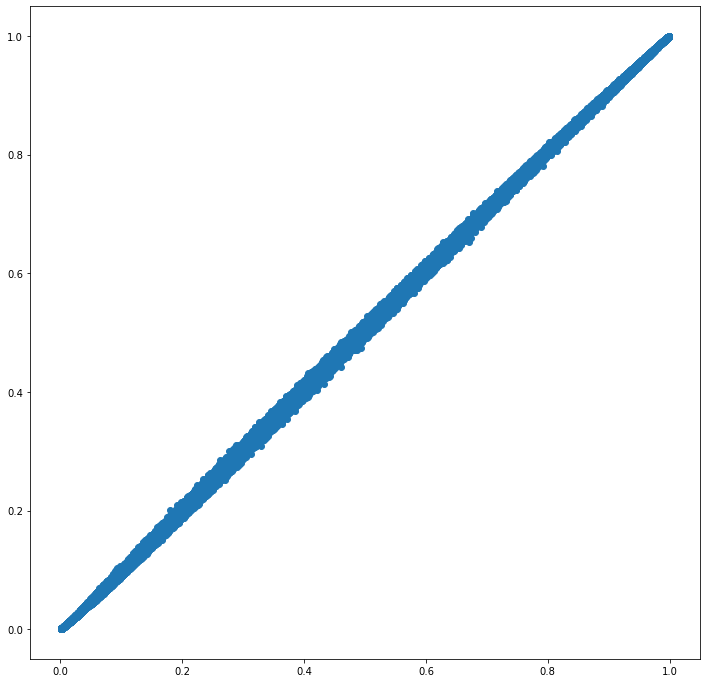

In [65]:
fig, ax = plt.subplots(figsize=(12, 12))
# plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), color="orange", linestyle="-")
# plt.xlabel("WK Blend")
# plt.ylabel("Chris best NN")
plt.scatter(gambling1["prediction"], gambling6["prediction"])
# plt.scatter(ensemble[""], blend_trees["prediction"])
# plt.scatter(s1, s3)
plt.show()